# Building a Python Web Scraping Project

Web scraping is the process of extracting and parsing data from websites in an automated fashion using a computer program. It's a useful technique for creating datasets for research and learning.

Link to web scraping guide of Jovian is https://jovian.ai/aakashns/python-web-scraping-project-guide

#### 1. Pick a website and describe your objective

- Browse through different sites and pick on to scrape. Check the "Project Ideas" section for inspiration.
- Identify the information you'd like to scrape from the site. Decide the format of the output CSV file.
- Summarize your project idea and outline your strategy in a Juptyer notebook.
- Use the requests library to download web pages

#### 2. Inspect the website's HTML source and identify the right URLs to download.
- Download and save web pages locally using the requests library.
- Create a function to automate downloading for different topics/search queries.
- Use Beautiful Soup to parse and extract information

#### 3. Parse and explore the structure of downloaded web pages using Beautiful soup.
- Use the right properties and methods to extract the required information.
- Create functions to extract from the page into lists and dictionaries.
- (Optional) Use a REST API to acquire additional information if required.

#### 4. Create CSV file(s) with the extracted information
- Create functions for the end-to-end process of downloading, parsing, and saving CSVs.
- Execute the function with different inputs to create a dataset of CSV files.
- Verify the information in the CSV files by reading them back using Pandas.

#### 5. Document and share your work
- Add proper headings and documentation in your Jupyter notebook.
- Publish your Jupyter notebook to your Jovian profile
- (Optional) Write a blog post about your project and share it online.  

## Scraping Top Repositories for GitHub Topics


### Project Outline

- We're going to scrape https://github.com/topics
- We'll get a list of topics. For each topic, we'll get topic title, topic page URL and topic description
- For each topic, we'll get the top 25 repositories in the topic from the topic page
- For each repository, we'll grab the repository name, username, stars and repo URL
- For each topic we'll create a CSV file in the following format:

```
Repo Name,Username,Stars,Repo URL
three.js,mrdoob,69700,https://github.com/mrdoob/three.js
libgdx,libgdx,18300,https://github.com/libgdx/libgdx
```

### Importing necessary libraries

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import os

In [2]:
# the url from which we are going to scrape the data is stored in topics_url
topics_url = 'https://github.com/topics'

# base_url is github homepage. It will be used in further code to create the links
base_url = 'https://github.com'

## step1. Main function to get the list of topics from Github page

The Github topic page looks something like this. In first step we will be scraping topic title, description and its url and store it in a dataframe.

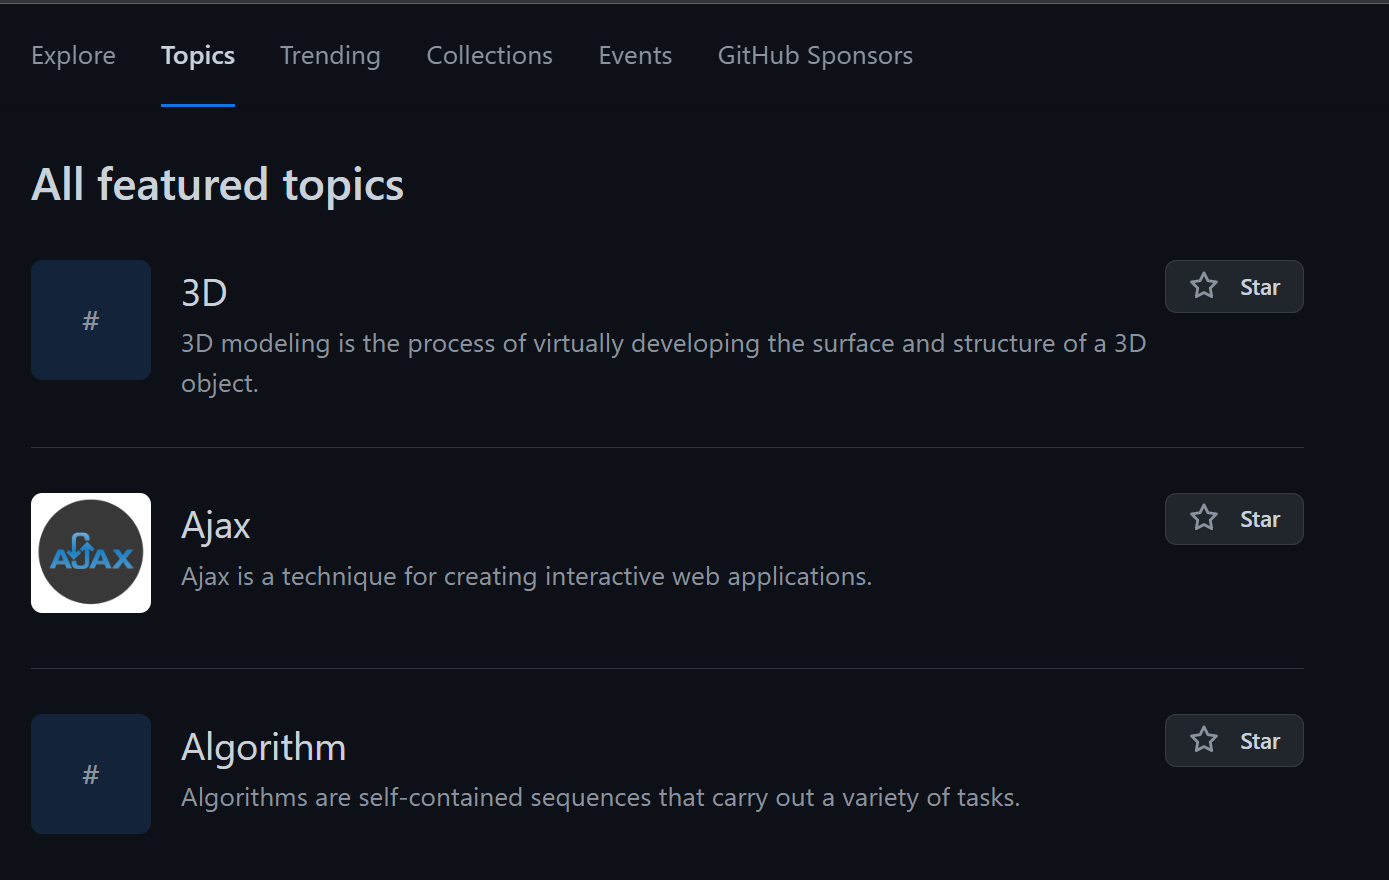

In [3]:
# (step1) This is the main function to get the list of topics from Github page
# this function calls sub funtions 
#        get_bs4_doc      : to get bs4 object of the url for futher extraction of tags
#        create_topics_df : create an output dataframe
def get_topics_df(topics_url):
    topics_doc = get_bs4_doc(topics_url)
    topics_df = create_topics_df(topics_doc)
    return topics_df

Note:- The requests module allows you to send HTTP requests using Python. The HTTP request returns a Response Object with all the response data (content, encoding, status, etc).

In [4]:
# This function Creates bs4 object / doc for extracting tags
def get_bs4_doc(topics_url):
    # using requests library to read topic_url
    response = requests.get(topics_url)
    # Check successful response
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topics_url))
    # Parse using Beautiful soup
    topics_doc = BeautifulSoup(response.text, 'lxml')
    return topics_doc

# This function creates dataframe from extracted info
# It calls below sub functions
#        get_topic_titles(): gives list of topic titles
#        get_topic_descs() : gives list of links
#        get_topic_links() : gives list of Descriptions 

def create_topics_df(topics_doc):
    # create a dict of topics by calling functions to get lists of topic titles, descriptions and links
    topics_dict = {'title':get_topic_titles(topics_doc),
                   'description': get_topic_descs(topics_doc), 
                   'url': get_topic_links(topics_doc)}
    # creates a dataframe from topics dict
    return pd.DataFrame(topics_dict)

Topic title can be seen under `p` tag.
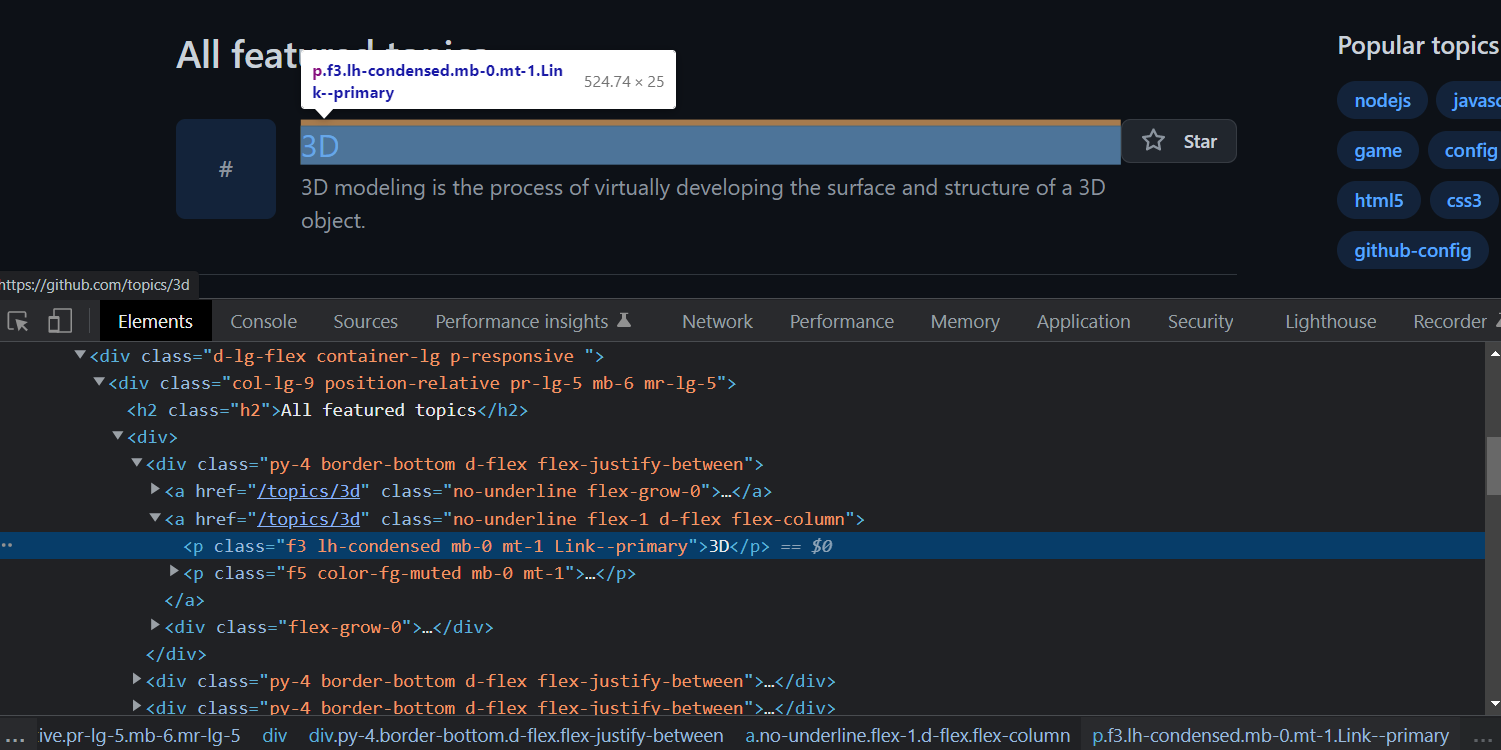

Topic description and link ('href') are also under `p` tag with different class.

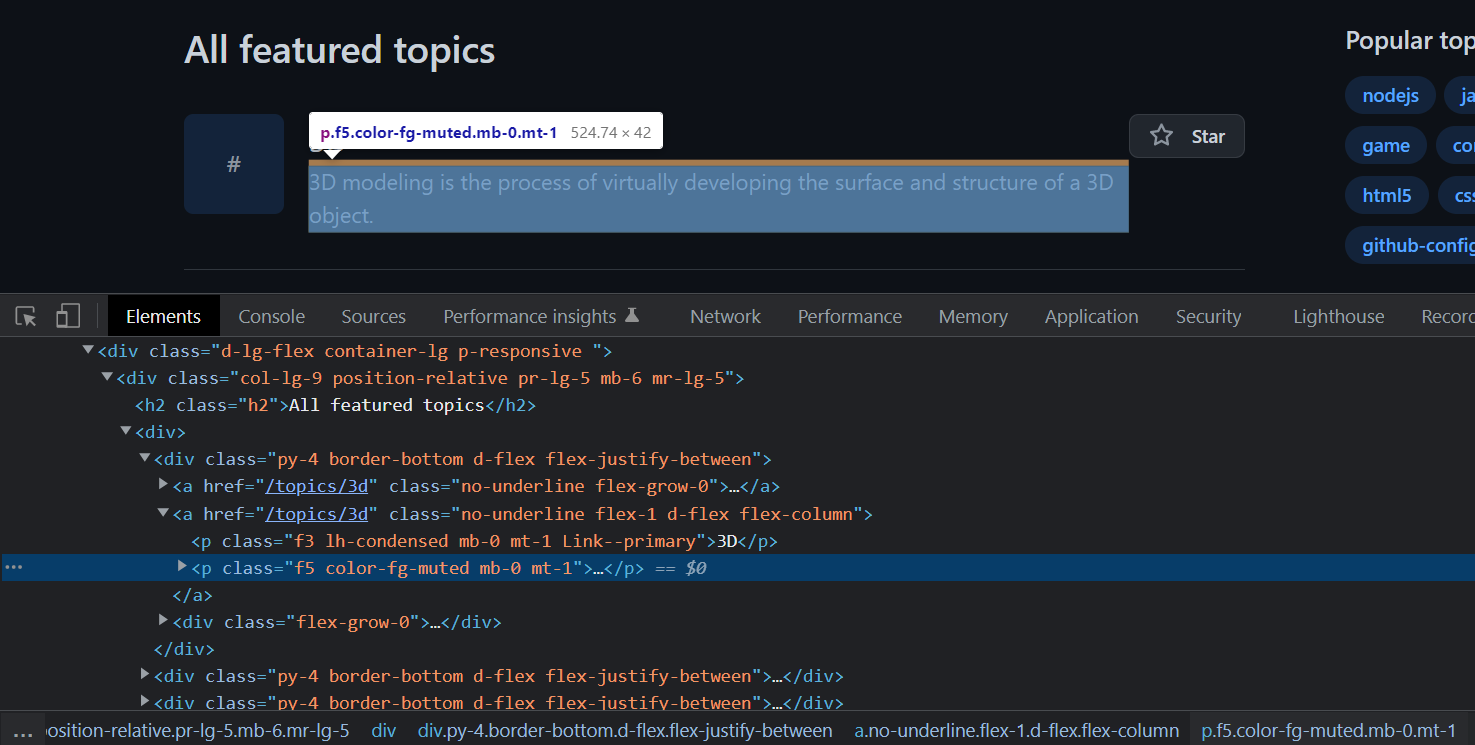

In [5]:
# This function gives list of topic titles
def get_topic_titles(topics_doc):
    # get topic title tags
    topic_selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = topics_doc.find_all('p',{'class': topic_selection_class})
    # extract all titles from tags and create a list
    topic_titles = [topic.text for topic in topic_title_tags]
    return topic_titles

# This function gives list of topic descriptions
def get_topic_descs(topics_doc):
    # get topic description tags
    topic_selection_class = 'f5 color-fg-muted mb-0 mt-1'
    topic_desc_tags = topics_doc.find_all('p',{'class': topic_selection_class})
    # extract all topic descriptions in a list
    topic_descs = [desc.text.strip() for desc in topic_desc_tags]
    return topic_descs

# This function gives list of topic links
def get_topic_links(topics_doc):
    # get topic link tags
    topic_link_class = 'no-underline flex-grow-0'
    topic_link_tags = topics_doc.find_all('a', {'class': topic_link_class})
    # extract all topic urls in a list
#    base_url = 'https://github.com'
    topic_links = [base_url + url['href'] for url in topic_link_tags]
    return topic_links  

In [6]:
# Lets check the main dataframe where we are extracting Github topics titles, desc and urls
get_topics_df(topics_url)

,title,description,url
0,3D,3D modeling is the process of virtually develo...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source hardware and softwar...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


### Step 2. Create a function to extract repository info for individual topic in topics dataframe

In [7]:
# Function to create a topic repository dataframe and export it to csv
# This function calls subfunctions
import os
def export_topic_repo(topic_url, path):
    if os.path.exists(path):
        print('THe file {} already exists.. skipping...'.format(path))
# Calling get_bs4_doc() function to get beautiful soup object of the topic url
# then running get_repo_info() function on its output
    each_topic_df = get_repo_info(get_bs4_doc(topic_url))
    each_topic_df.to_csv(path, index=None)

In [8]:
## This function creates 
#  - runs main function and gets the topics df
#  - a folder (path) to store the exported csvs,
#  - runs a for loop on topics df to get individual topic title and links in order to be able to export it
#  - 
   
def scrape_topic_repo():
    print('Scraping list of topics')
    # get main topics df
    topics_df = get_topics_df(topics_url)
    # create a folder to store repository csvs
    os.makedirs('Git_topics', exist_ok=True) # exist_ok=True does not throw an error even if the folder is already exists at the path
    # Running a for loop to get each topic title and url
    for index,row in topics_df.iterrows():
        print("scraping top repositories for {}".format(row['title']))
    # calling a function to export a topic to csv    
        export_topic_repo(row['url'],'Git_topics/{}.csv'.format(row['title']))

We need to scrape this repository info which is done by get_repo_info() function.

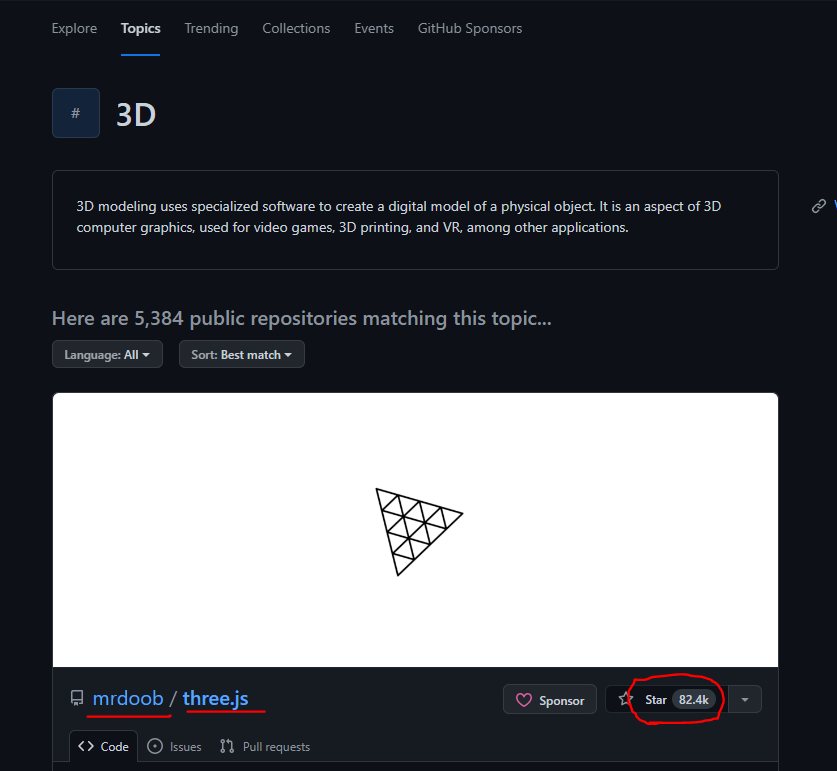

Tags for username, repository name, repo url.

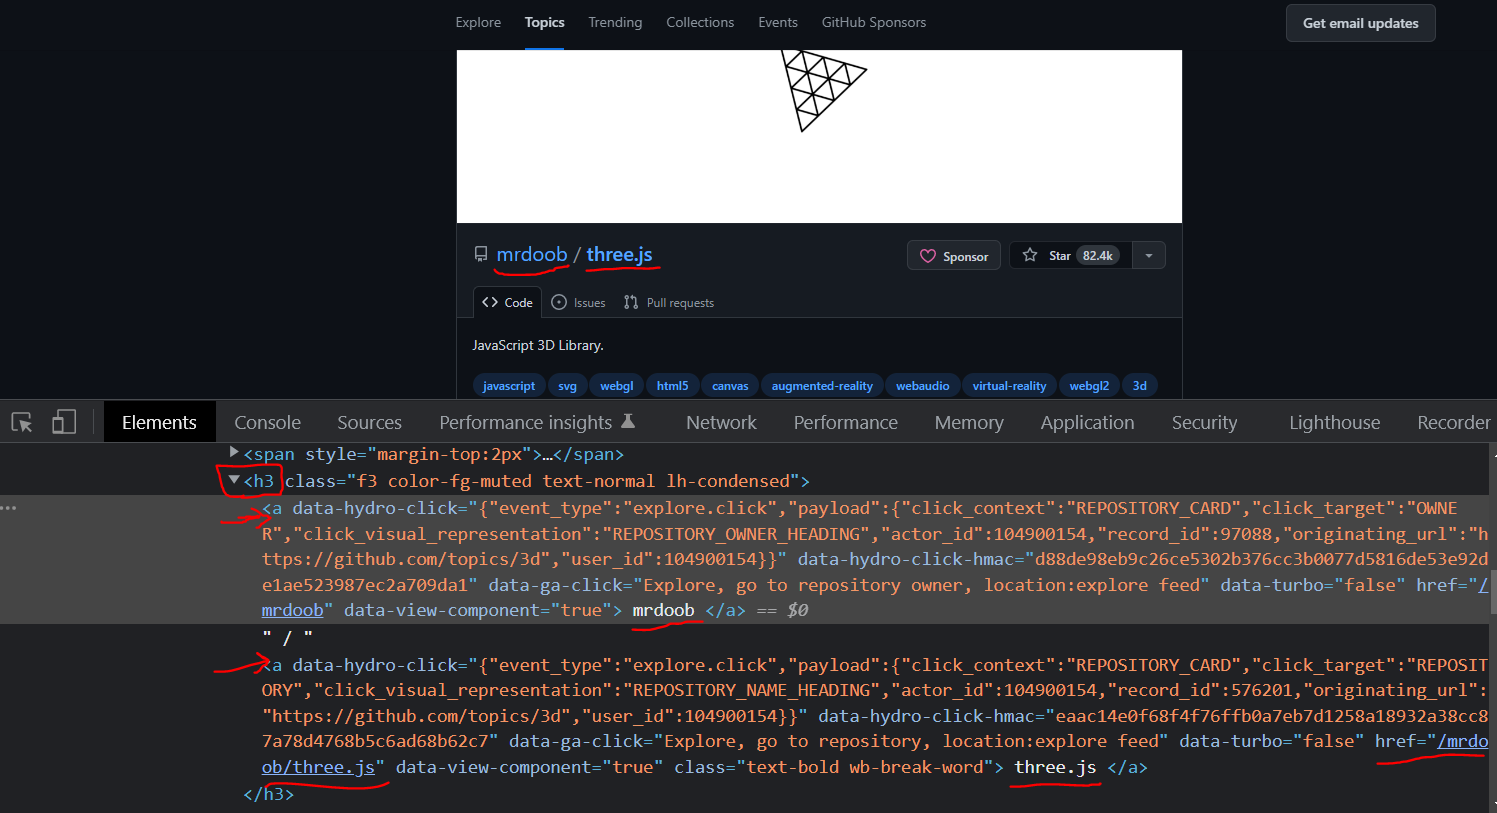

Span Tag for extracting stars.

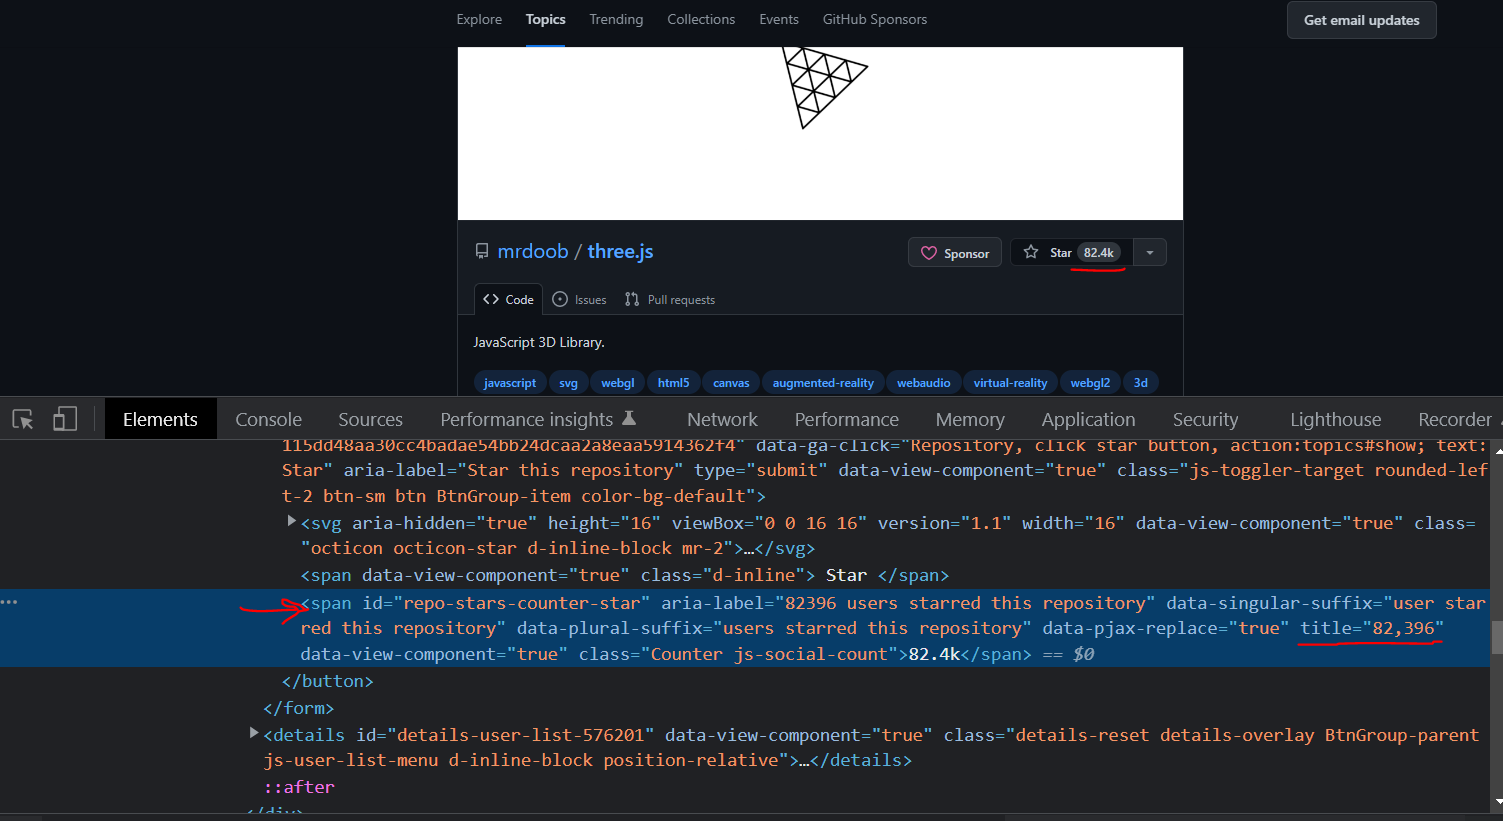

In [9]:
# This function extracts the necessary repository info from the respective tags and creates a dataframe out of it
# It takes the bs4 object of the topic url as input
def get_repo_info(topic_doc):
    # Get h3 tags from repsective class
    h3_class = 'f3 color-fg-muted text-normal lh-condensed'
    h3_tags = topic_doc.find_all('h3', {'class':h3_class})
    # Get span tags from repsective class
    span_class = 'Counter js-social-count'
    span_tags = topic_doc.find_all('span',{'class': span_class})

# Extract usernames, repo names, repo urls and stars from tags
    usernames = []
    reponames = []
    repourls = []
    stars = []
# running a for loop on entire tag data to extract the data and store in respective lists
    for i in range(len(h3_tags)):
        h3ia = h3_tags[i].find_all('a')
        usernames.append(h3ia[0].text.strip())
        reponames.append(h3ia[1].text.strip())
        repourls.append(base_url + h3ia[1]['href'])
        stars.append(span_tags[i]['title'])

# Create a dict
    topic_dict ={
            'usernames':usernames,
            'reponames':reponames,
            'repourls' :repourls,
            'stars'    :stars }
# create a dataframe
    topic_df = pd.DataFrame(topic_dict)
    
    return topic_df

### Step 3. The Final step is to run `scrape_topic_repo()` function to get the output i.e. topic wise csvs containing repository information. 

In [10]:
scrape_topic_repo()

Scraping list of topics
scraping top repositories for 3D
scraping top repositories for Ajax
scraping top repositories for Algorithm
scraping top repositories for Amp
scraping top repositories for Android
scraping top repositories for Angular
scraping top repositories for Ansible
scraping top repositories for API
scraping top repositories for Arduino
scraping top repositories for ASP.NET
scraping top repositories for Atom
scraping top repositories for Awesome Lists
scraping top repositories for Amazon Web Services
scraping top repositories for Azure
scraping top repositories for Babel
scraping top repositories for Bash
scraping top repositories for Bitcoin
scraping top repositories for Bootstrap
scraping top repositories for Bot


Exception: Failed to load page https://github.com/topics/bot

In [11]:
# Rerunning the function as some topics failed to load
scrape_topic_repo()

Scraping list of topics
scraping top repositories for 3D
THe file Git_topics/3D.csv already exists.. skipping...
scraping top repositories for Ajax
THe file Git_topics/Ajax.csv already exists.. skipping...
scraping top repositories for Algorithm
THe file Git_topics/Algorithm.csv already exists.. skipping...
scraping top repositories for Amp
THe file Git_topics/Amp.csv already exists.. skipping...
scraping top repositories for Android
THe file Git_topics/Android.csv already exists.. skipping...
scraping top repositories for Angular
THe file Git_topics/Angular.csv already exists.. skipping...
scraping top repositories for Ansible
THe file Git_topics/Ansible.csv already exists.. skipping...
scraping top repositories for API
THe file Git_topics/API.csv already exists.. skipping...
scraping top repositories for Arduino
THe file Git_topics/Arduino.csv already exists.. skipping...
scraping top repositories for ASP.NET
THe file Git_topics/ASP.NET.csv already exists.. skipping...
scraping top r

Exception: Failed to load page https://github.com/topics/clojure

In [24]:
# Rerunning the function as some topics failed to load
scrape_topic_repo()

Scraping list of topics
scraping top repositories for 3D
THe file Git_topics/3D.csv already exists.. skipping...
scraping top repositories for Ajax
THe file Git_topics/Ajax.csv already exists.. skipping...
scraping top repositories for Algorithm
THe file Git_topics/Algorithm.csv already exists.. skipping...
scraping top repositories for Amp
THe file Git_topics/Amp.csv already exists.. skipping...
scraping top repositories for Android
THe file Git_topics/Android.csv already exists.. skipping...
scraping top repositories for Angular
THe file Git_topics/Angular.csv already exists.. skipping...
scraping top repositories for Ansible
THe file Git_topics/Ansible.csv already exists.. skipping...
scraping top repositories for API
THe file Git_topics/API.csv already exists.. skipping...
scraping top repositories for Arduino
THe file Git_topics/Arduino.csv already exists.. skipping...
scraping top repositories for ASP.NET
THe file Git_topics/ASP.NET.csv already exists.. skipping...
scraping top r

Exception: Failed to load page https://github.com/topics/chrome

## Improvement ideas

- Currently this code scrapes the data on first page only - from main topics home page as well as individual topic pages.
- The code can be upgraded to scrape futher pages like page 2, page 3, page 3.. etc as per requirement.

High level steps to do that would be
- The next page can be obtained by adding '?page = 2' for eg.https://github.com/topics/3d?page=2
- We can run a loop to modify the urls and get further pages. Then run the scraping functions on them.

In [22]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Additional information on scraping images from the web pages 

Let's first get the bs4 object for an url

In [13]:
github_bs4_doc = get_bs4_doc('https://github.com/topics')

We need to search for `img` tags for images.

In [14]:
img_tags = github_bs4_doc.find_all('img')

In [15]:
img_tags[10]['src']

'https://raw.githubusercontent.com/github/explore/80688e429a7d4ef2fca1e82350fe8e3517d3494d/topics/angular/angular.png'

In [16]:
img_url = img_tags[10]['src']

In [17]:
print(img_url)

https://raw.githubusercontent.com/github/explore/80688e429a7d4ef2fca1e82350fe8e3517d3494d/topics/angular/angular.png


#### To export an image
- create an object (response) using requests module
- open a file with 'wb' encoding which is used for images and write response.content into a file

In [18]:
response = requests.get('https://cdn.pixabay.com/photo/2016/07/05/16/53/leaves-1498985_960_720.jpg')

In [19]:
type(response)

requests.models.Response

In [20]:
response.status_code

200

In [21]:
# code to export an image
with open('leaves.png', 'wb') as f:
    f.write(response.content)